In [10]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



In [11]:
df = pd.read_csv('datos_seguro.csv')
df.head()

,edad,compra
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [12]:
df.describe()

,edad,compra
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


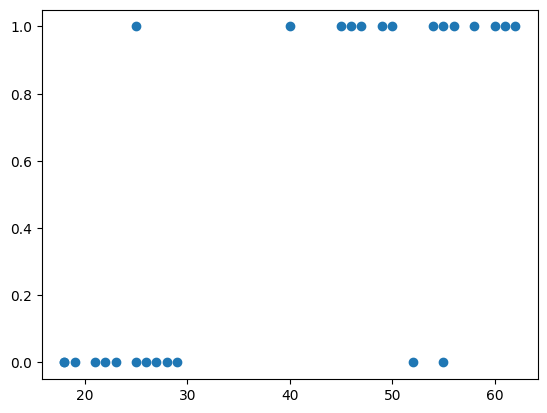

In [13]:
plt.scatter(df['edad'], df['compra'])

In [14]:
#[[]] -> la convierte en un data frame 
# test_size= tamaño de la prueba 
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(df[['edad']], df['compra'], test_size=0.2)

In [15]:
X_prueba


,edad
8,62
11,28
10,18
0,22
21,26
24,50


In [16]:
modelo = LogisticRegression()
modelo.fit(X_prueba, y_prueba)

LogisticRegression()

In [17]:
modelo.score(X_prueba, y_prueba)

1.0

In [18]:
datos_nuevos = pd.DataFrame ({'edad':[20, 25, 30,35,40,45,50,55,60]})
datos_nuevos.head()

,edad
0,20
1,25
2,30
3,35
4,40


In [19]:
probabilidades = modelo.predict_proba(datos_nuevos)
probabilidades

array([[9.99526887e-01, 4.73113468e-04],
       [9.96667074e-01, 3.33292634e-03],
       [9.76919814e-01, 2.30801856e-02],
       [8.56963330e-01, 1.43036670e-01],
       [4.58882591e-01, 5.41117409e-01],
       [1.07170186e-01, 8.92829814e-01],
       [1.67064327e-02, 9.83293567e-01],
       [2.39912335e-03, 9.97600877e-01],
       [3.40285287e-04, 9.99659715e-01]])

In [20]:
prob_compra = probabilidades[:, 1]
prob_compra

array([4.73113468e-04, 3.33292634e-03, 2.30801856e-02, 1.43036670e-01,
       5.41117409e-01, 8.92829814e-01, 9.83293567e-01, 9.97600877e-01,
       9.99659715e-01])

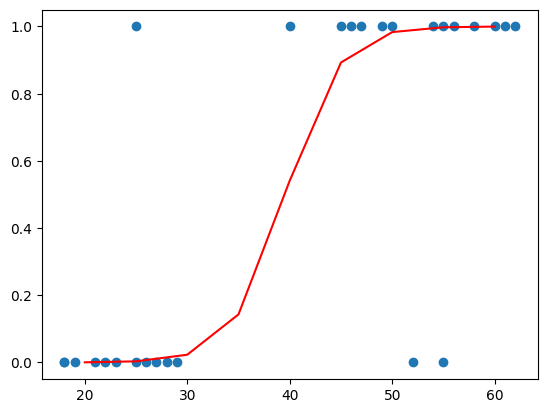

In [21]:
plt.scatter(df['edad'], df['compra'])
plt.plot(datos_nuevos['edad'],prob_compra, color= 'red')